## Webscraping 

Using the <code> BeautifulSoup </code> to scrape data that is available in a table and storing the data into a <code>Pandas</code> dataframe and creating simple visualization using <code>Seaborn</code>

## Importing all necessary libraries

In [82]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import seaborn as sns

## Scraping data using BeautifulSoup

In [39]:
url = 'https://www.worldometers.info/world-population/'

In [40]:
data = requests.get(url).text

In [41]:
soup = BeautifulSoup(data, 'html5lib')

In [42]:
tables = soup.find_all('table')

In [70]:
tables

[<table class="table table-striped table-bordered table-hover table-condensed table-list"><thead> <tr> <th>Year<br/> (July 1) </th><th>Population</th><th>Yearly % <br/> Change</th><th>Yearly<br/> Change</th><th>Median <br/>Age</th><th>Fertility <br/>Rate</th><th>Density <br/>(P/Km²)</th><th>Urban<br/> Pop %</th><th>Urban Population</th> </tr><tr> <td>2020</td> <td><strong>7,794,798,739</strong></td> <td>1.05 %</td> <td>81,330,639</td> <td>30.9</td> <td>2.47</td> <td>52</td> <td>56.2 %</td> <td>4,378,993,944</td> </tr> <tr> <td>2019</td> <td><strong>7,713,468,100</strong></td> <td>1.08 %</td> <td>82,377,060</td> <td>29.8</td> <td>2.51</td> <td>52</td> <td>55.7 %</td> <td>4,299,438,618</td> </tr></thead><tbody><tr> <td>2018</td> <td><strong>7,631,091,040</strong></td> <td>1.10 %</td> <td>83,232,115</td> <td>29.8</td> <td>2.51</td> <td>51</td> <td>55.3 %</td> <td>4,219,817,318</td></tr><tr> <td>2017</td> <td><strong>7,547,858,925</strong></td> <td>1.12 %</td> <td>83,836,876</td> <td>29.8<

In [69]:
for index , table in enumerate(tables):
    if ('popbycountry' in str(table)):
        table_index = index
print(table_index)

4


In [71]:
print(tables[table_index].prettify())

<table cellspacing="0" class="table table-striped table-bordered" id="popbycountry" width="100%">
 <thead>
  <tr>
   <th>
    #
   </th>
   <th>
    Country (or dependency)
   </th>
   <th>
    Population
    <br/>
    (2020)
   </th>
   <th>
    Yearly
    <br/>
    Change
   </th>
   <th>
    Net
    <br/>
    Change
   </th>
   <th>
    Density
    <br/>
    (P/Km²)
   </th>
   <th>
    Land Area
    <br/>
    (Km²)
   </th>
   <th>
    Migrants
    <br/>
    (net)
   </th>
   <th>
    Fert.
    <br/>
    Rate
   </th>
   <th>
    Med.
    <br/>
    Age
   </th>
   <th>
    Urban
    <br/>
    Pop %
   </th>
   <th>
    World
    <br/>
    Share
   </th>
  </tr>
 </thead>
 <tbody>
  <tr>
   <td>
    1
   </td>
   <td style="font-weight: bold; font-size:15px; text-align:left">
    <a href="/world-population/china-population/">
     China
    </a>
   </td>
   <td style="font-weight: bold;">
    1,439,323,776
   </td>
   <td>
    0.39 %
   </td>
   <td>
    5,540,090
   </td>
   <td>
 

## Storing the scraped data from the website into a <code>pandas</code> dataframe

In [92]:
population_data = pd.DataFrame(columns = ['Rank', 'Country', 'Population', 'Density', 'Fertility_Rate'])

for row in tables[table_index].tbody.find_all('tr'):
    col = row.find_all('td')
    rank = col[0].text
    country = col[1].text
    population = col[2].text
    density = col[5].text
    fertility = col[8].text
    
    population_data = population_data.append({"Rank": rank, "Country": country, 'Population': population, 'Density': density, 'Fertility_Rate': fertility}, ignore_index = True)

In [93]:
population_data

,Rank,Country,Population,Density,Fertility_Rate
0,1,China,"1,439,323,776",153,1.69
1,2,India,"1,380,004,385",464,2.2402
2,3,United States,"331,002,651",36,1.7764
3,4,Indonesia,"273,523,615",151,2.3195
4,5,Pakistan,"220,892,340",287,3.55
...,...,...,...,...,...
230,231,Montserrat,"4,992",50,N.A.
231,232,Falkland Islands,"3,480",0,N.A.
232,233,Niue,"1,626",6,N.A.
233,234,Tokelau,"1,357",136,N.A.


In [94]:
population_data.dtypes

Rank              object
Country           object
Population        object
Density           object
Fertility_Rate    object
dtype: object

## Cleaning data stored in the dataframe

In [106]:
population_data["Population"] = population_data['Population'].replace(',|\$',"")
population_data.dropna(inplace=True)

population_data = population_data[population_data['Population'] != ""]
population_data.head()

,Rank,Country,Population,Density,Fertility_Rate
0,1,China,1439323776,153,1.69
1,2,India,1380004385,464,2.2402
2,3,United States,331002651,36,1.7764
3,4,Indonesia,273523615,151,2.3195
4,5,Pakistan,220892340,287,3.55


In [115]:
population_data["Density"] = population_data['Density'].replace(',|\$',"")
population_data.dropna(inplace=True)

population_data = population_data[population_data['Density'] != ""]

In [152]:
population_data["Fertility_Rate"] = population_data['Fertility_Rate'].replace(',|\$',"")
population_data["Fertility_Rate"] = population_data['Fertility_Rate'].replace('N.A.',"NaN")
population_data["Fertility_Rate"] = population_data['Fertility_Rate'].replace('NaN',"0")
population_data.dropna(inplace=True)
population_data = population_data[population_data['Fertility_Rate'] != ""]

In [154]:
population_data['Rank'] = pd.to_numeric(population_data['Rank'])
population_data['Population'] = pd.to_numeric(population_data['Population'])
population_data['Density'] = pd.to_numeric(population_data['Density'])
population_data['Fertility_Rate'] = pd.to_numeric(population_data['Fertility_Rate'])

## Using visualization techniques of seaborn to visualize data to create simple barplots

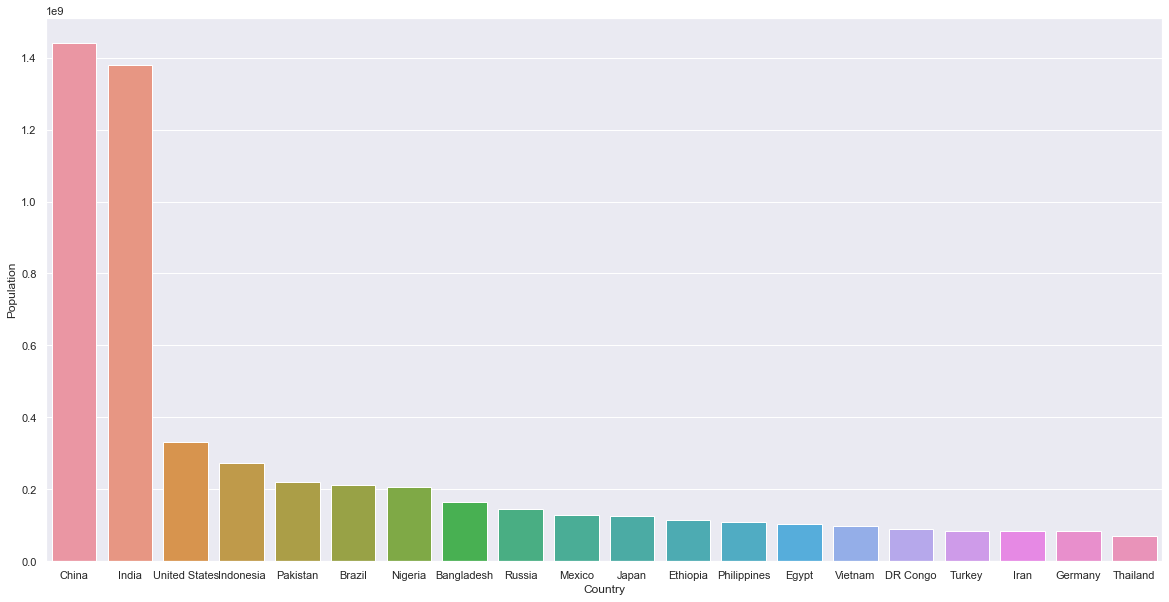

In [155]:
sns.set(rc = {'figure.figsize' : (20,10)})
ax1 = sns.barplot(x='Country', y='Population', data=population_data.head(20))

In [156]:
population_data

,Rank,Country,Population,Density,Fertility_Rate
0,1,China,1439323776,153,1.6900
1,2,India,1380004385,464,2.2402
2,3,United States,331002651,36,1.7764
3,4,Indonesia,273523615,151,2.3195
4,5,Pakistan,220892340,287,3.5500
...,...,...,...,...,...
230,231,Montserrat,4992,50,0.0000
231,232,Falkland Islands,3480,0,0.0000
232,233,Niue,1626,6,0.0000
233,234,Tokelau,1357,136,0.0000


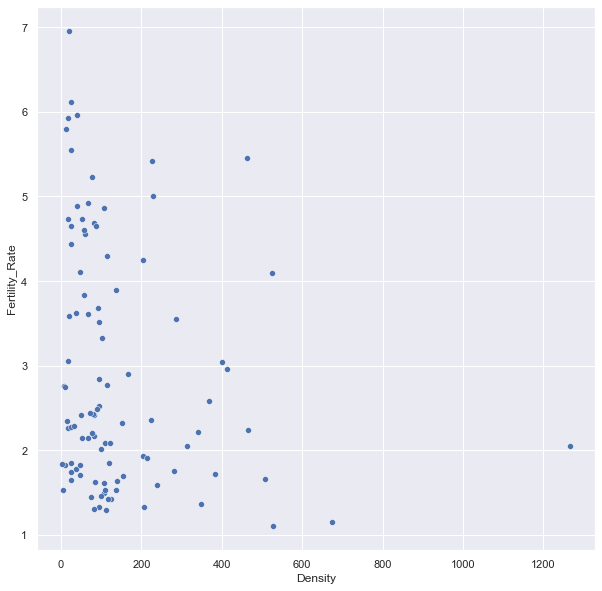

In [162]:
sns.set(rc = {'figure.figsize' : (10,10)})
ax2 = sns.scatterplot(x='Density', y='Fertility_Rate', data=population_data.head(100))

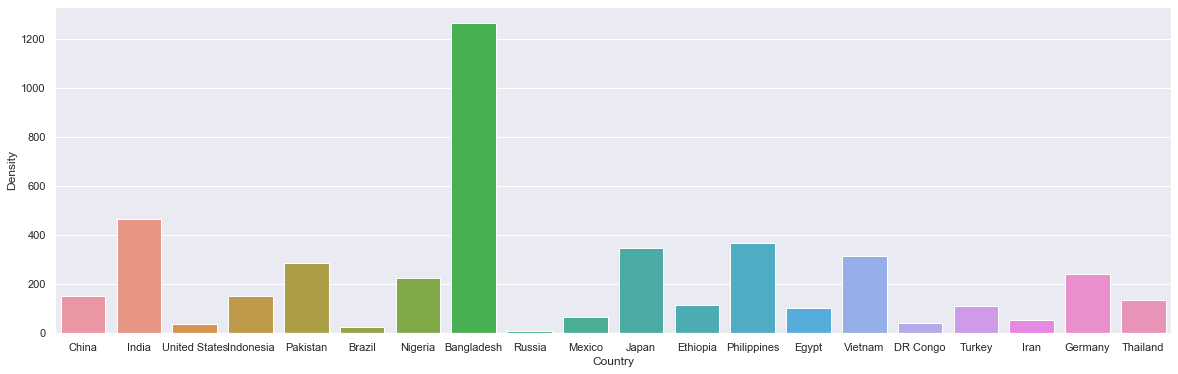

In [178]:
sns.set(rc = {'figure.figsize' : (20,6)})
ax1 = sns.barplot(x='Country', y='Density', data=population_data.head(20))

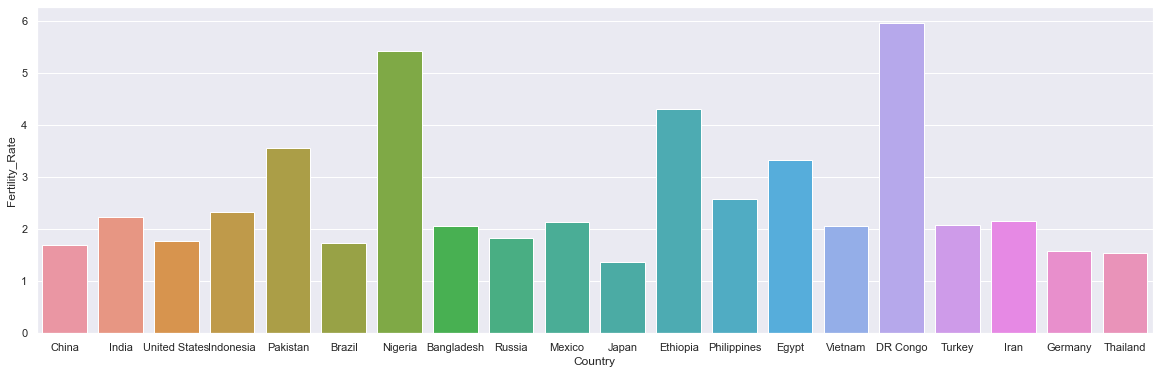

In [170]:
sns.set(rc = {'figure.figsize' : (20,6)})
ax2 = sns.barplot(x='Country', y='Fertility_Rate', data=population_data.head(20))